<a href="https://colab.research.google.com/github/CtrlJemima/CellphoneDB/blob/master/WAD_24_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
data = {
    "Participant": ["P1", "P2", "P3", "P4", "P5", "P6", "P7", "P8", "P9", "P10", "P11", "P12", "P13", "P14", "P15", "P16", "P17", "P18", "P19", "P20", "P21", "P22", "P23", "P24", "P25", "P26", "P27", "P28"],
    "Experience_Rating": [5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 5, 4, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5,5],
    "Impact_Rating": [5, 4, 5, 5, 4, 4, 3, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5],
    "Duration_Hours": [1, 1.5, 1.5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.5, 1.5, 1, 1, 0.5, 1.5, 1, 1, 1, 1, 1.5, 1.5, 1.5, 1.5]
}

df = pd.DataFrame(data)
df.head()

,Participant,Experience_Rating,Impact_Rating,Duration_Hours
0,P1,5,5,1.0
1,P2,4,4,1.5
2,P3,5,5,1.5
3,P4,5,5,1.0
4,P5,5,4,1.0


In [4]:
from scipy.stats import spearmanr

# Correlation between Duration and Experience Rating
exp_corr, exp_p = spearmanr(df["Duration_Hours"], df["Experience_Rating"])

# Correlation between Duration and Impact Rating
imp_corr, imp_p = spearmanr(df["Duration_Hours"], df["Impact_Rating"])

print(f"Spearman correlation between duration and experience rating: ρ = {exp_corr:.2f}, p = {exp_p:.3f}")
print(f"Spearman correlation between duration and impact rating: ρ = {imp_corr:.2f}, p = {imp_p:.3f}")

Spearman correlation between duration and experience rating: ρ = -0.33, p = 0.088
Spearman correlation between duration and impact rating: ρ = 0.07, p = 0.709


In [19]:
!pip install seaborn

<ipython-input-20-72c1b2371fd0>:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


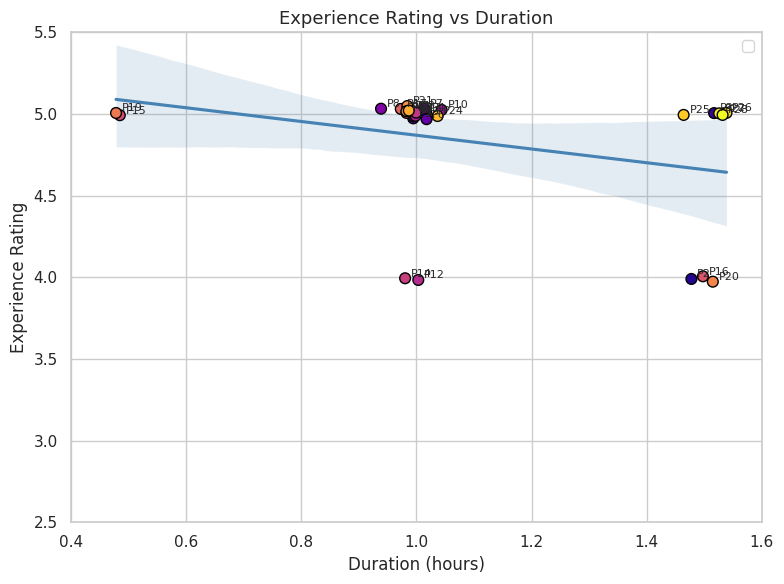

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")

# Add jitter
x_jitter = np.random.normal(0, 0.02, size=len(df))
y_jitter = np.random.normal(0, 0.02, size=len(df))

# Create jittered versions of data
df["Duration_Jittered"] = df["Duration_Hours"] + x_jitter
df["Experience_Jittered"] = df["Experience_Rating"] + y_jitter

# Plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x="Duration_Jittered", y="Experience_Jittered", data=df,
            scatter=False, line_kws={"color": "steelblue", "label": "Trend line"})

# Plot the jittered points separately with colours
plt.scatter(df["Duration_Jittered"], df["Experience_Jittered"],
            c=np.linspace(0, 1, len(df)), cmap='plasma', s=60, edgecolor='black')

# Label each point
for i in range(len(df)):
    plt.text(df["Duration_Jittered"][i] + 0.01, df["Experience_Jittered"][i] + 0.01,
             df["Participant"][i], fontsize=8)

plt.title("Experience Rating vs Duration", fontsize=13)
plt.xlabel("Duration (hours)")
plt.ylabel("Experience Rating")
plt.ylim(2.5, 5.5)
plt.xlim(0.4, 1.6)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
pip install adjustText

<ipython-input-38-a45d55f9474f>:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


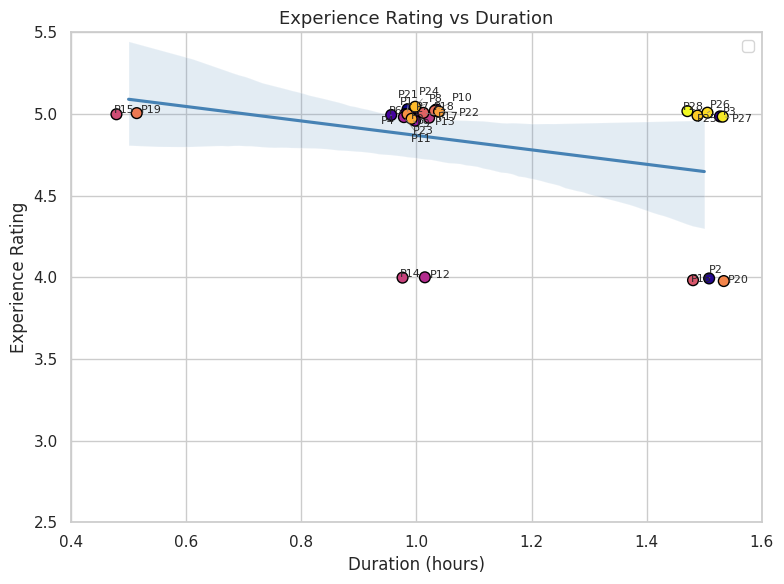

In [38]:
from adjustText import adjust_text

sns.set(style="whitegrid")

# Add jitter
x_jitter = np.random.normal(0, 0.02, size=len(df))
y_jitter = np.random.normal(0, 0.02, size=len(df))

# Create jittered versions of data
df["Duration_Jittered"] = df["Duration_Hours"] + x_jitter
df["Experience_Jittered"] = df["Experience_Rating"] + y_jitter

# Plot setup
plt.figure(figsize=(8, 6))

# Plot regression line (non-jittered, to keep it accurate)
sns.regplot(x="Duration_Hours", y="Experience_Rating", data=df,
            scatter=False, line_kws={"color": "steelblue", "label": "Trend line"})

# Plot jittered scatter points
scatter = plt.scatter(df["Duration_Jittered"], df["Experience_Jittered"],
                      c=np.linspace(0, 1, len(df)), cmap='plasma', s=60, edgecolor='black')

# Add text labels with adjust_text
texts = []
for i in range(len(df)):
    texts.append(
        plt.text(df["Duration_Jittered"][i], df["Experience_Jittered"][i],
                 df["Participant"][i], fontsize=8)
    )

adjust_text(texts, arrowprops=dict(arrowstyle="-", color='gray', lw=0.5))

# Final plot details
plt.title("Experience Rating vs Duration", fontsize=13)
plt.xlabel("Duration (hours)")
plt.ylabel("Experience Rating")
plt.ylim(2.5, 5.5)
plt.xlim(0.4, 1.6)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("experience_vs_duration.png", dpi=300, bbox_inches='tight')
# Then display the plot
plt.show()

In [39]:
from google.colab import files
files.download("experience_vs_duration.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-36-a199fa22156b>:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


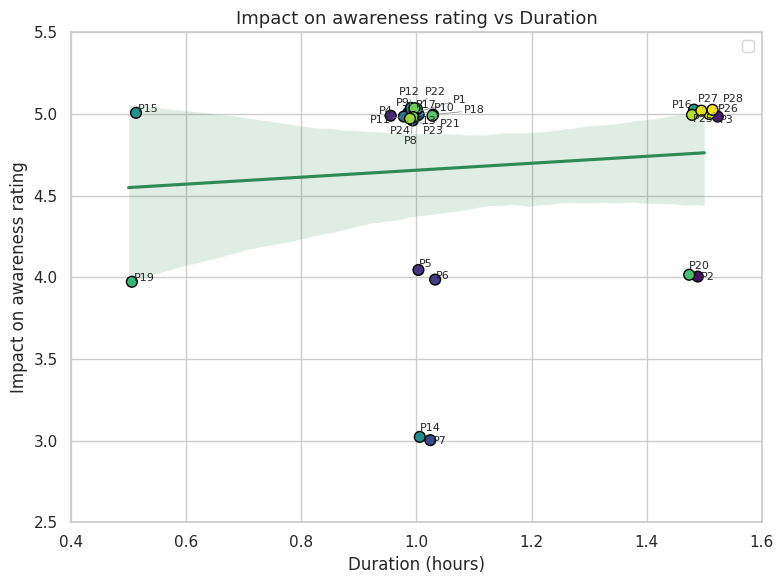

In [36]:
from adjustText import adjust_text
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")

# Add jitter
x_jitter = np.random.normal(0, 0.02, size=len(df))
y_jitter = np.random.normal(0, 0.02, size=len(df))

# Create jittered versions of data
df["Duration_Jittered"] = df["Duration_Hours"] + x_jitter
df["Impact_Jittered"] = df["Impact_Rating"] + y_jitter

# Plot setup
plt.figure(figsize=(8, 6))

# Regression line (non-jittered)
sns.regplot(x="Duration_Hours", y="Impact_Rating", data=df,
            scatter=False, line_kws={"color": "seagreen", "label": "Trend line"})

# Scatterplot with jittered points
scatter = plt.scatter(df["Duration_Jittered"], df["Impact_Jittered"],
                      c=np.linspace(0, 1, len(df)), cmap='viridis', s=60, edgecolor='black')

# Label points
texts = []
for i in range(len(df)):
    texts.append(
        plt.text(df["Duration_Jittered"][i], df["Impact_Jittered"][i],
                 df["Participant"][i], fontsize=8)
    )

adjust_text(texts, arrowprops=dict(arrowstyle="-", color='gray', lw=0.5))

# Labels and limits
plt.title("Impact on awareness rating vs Duration", fontsize=13)
plt.xlabel("Duration (hours)")
plt.ylabel("Impact on awareness rating")
plt.ylim(2.5, 5.5)
plt.xlim(0.4, 1.6)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("impact_vs_duration.png", dpi=300, bbox_inches='tight')

# Then display the plot
plt.show()

In [37]:
from google.colab import files
files.download("impact_vs_duration.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

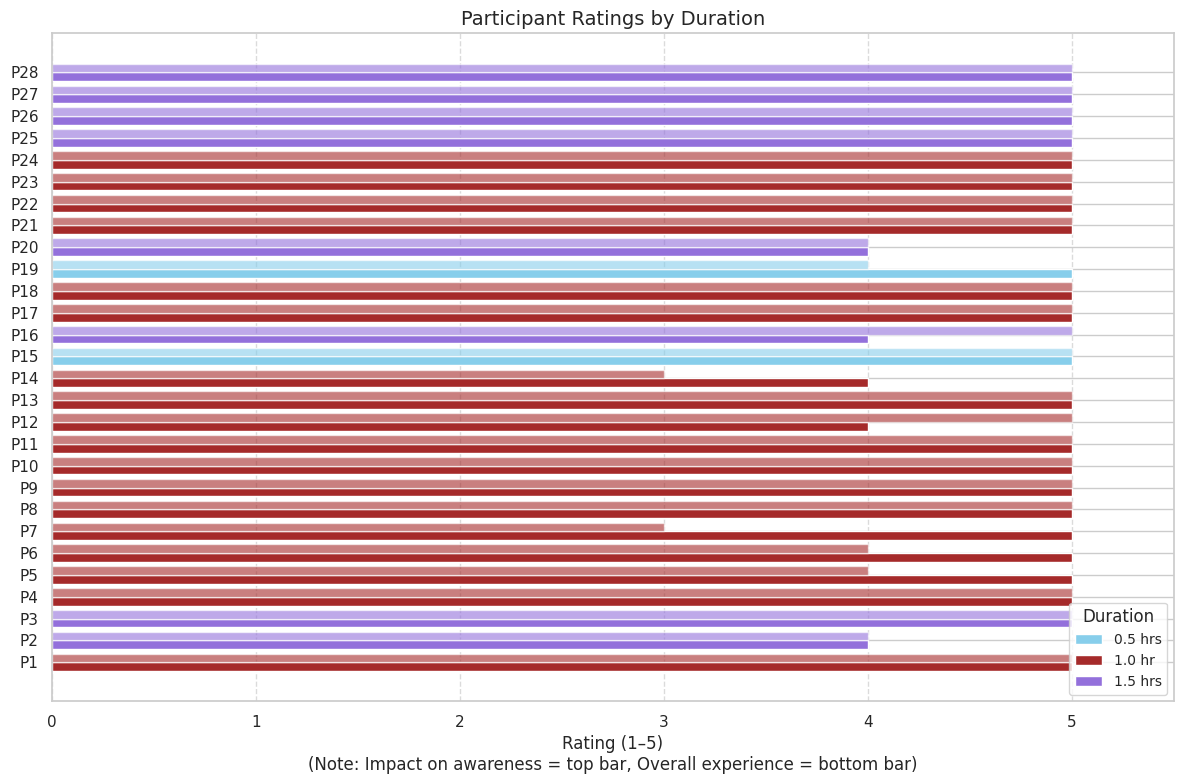

In [40]:
# Step 1: Setup and prepare data
participants = df["Participant"]
x = np.arange(len(participants))  # y-axis positions
experience = df["Experience_Rating"]
awareness = df["Impact_Rating"]
duration = df["Duration_Hours"]

# Step 2: Define color by duration
def duration_color(d):
    if d == 0.5:
        return "skyblue"
    elif d == 1.0:
        return "brown"
    elif d == 1.5:
        return "mediumpurple"

# Generate color list based on duration
colors = [duration_color(d) for d in duration]

# Step 3: Plot grouped bars (experience and awareness per participant)
bar_width = 0.4

plt.figure(figsize=(12, 8))
for i in range(len(participants)):
    # Experience bar (top/left bar)
    plt.barh(x[i] - bar_width/2, experience[i], height=bar_width,
             color=colors[i])
    # Awareness bar (bottom/right bar)
    plt.barh(x[i] + bar_width/2, awareness[i], height=bar_width,
             color=colors[i], alpha=0.6)

# Step 4: Aesthetics
plt.yticks(x, participants)
plt.xlabel("Rating (1–5)\n(Note: Impact on awareness = top bar, Overall experience = bottom bar)")
plt.title("Participant Ratings by Duration", fontsize=14)
plt.xlim(0, 5.5)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Custom legend for duration only
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='skyblue', label='0.5 hrs'),
    Patch(facecolor='brown', label='1.0 hr'),
    Patch(facecolor='mediumpurple', label='1.5 hrs')
]
plt.legend(handles=legend_elements, loc='lower right', fontsize=10, title="Duration")

plt.tight_layout()


# Save the figure
plt.savefig("particpant combined rating_vs_duration.png", dpi=300, bbox_inches='tight')

# Then display the plot
plt.show()

In [41]:
from google.colab import files
files.download("particpant combined rating_vs_duration.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>